In [14]:
import pandas            as pd
import networkx          as nx
import matplotlib.pyplot as plt

from utils import construct_prop_df
from utils import construct_graph

In [4]:
PATH      = 'twitter15/'
PROP_PATH = PATH + 'tree/'

THRESHOLDS = [0, 5, 30, 60, 180, 480, 720, 1440]

RT_UNDER_COLUMNS = []
for t in THRESHOLDS[1:]:
  RT_UNDER_COLUMNS.append(f'rts_under_{t}_min')

In [5]:
df = pd.read_csv(PATH + 'dataset_enhanced.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1490 non-null   int64  
 1   tweet               1490 non-null   object 
 2   label               1490 non-null   object 
 3   poster              1490 non-null   int64  
 4   num_rt              1490 non-null   int64  
 5   depth_max           1490 non-null   int64  
 6   depth_avg           1490 non-null   float64
 7   time_total          1490 non-null   float64
 8   time_avg            1490 non-null   float64
 9   rts_half_life       1490 non-null   float64
 10  num_circles         1490 non-null   int64  
 11  rts_under_5_min     1490 non-null   int64  
 12  rts_under_30_min    1490 non-null   int64  
 13  rts_under_60_min    1490 non-null   int64  
 14  rts_under_180_min   1490 non-null   int64  
 15  rts_under_480_min   1490 non-null   int64  
 16  rts_un

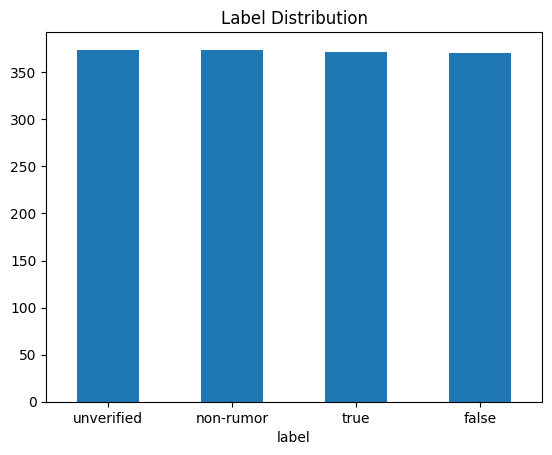

In [7]:
ax = df['label'].value_counts().plot(kind='bar', title="Label Distribution")
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.show()

In [8]:
# mapping and separation
label_mapping = {label: idx for idx, label in enumerate(sorted(set(df['label'])))}
print('Label Mapping')
print(label_mapping)
df['label'] = df['label'].map(label_mapping)

dfs    = []
titles = []
for t, l in label_mapping.items():
    dfs.append(df[df['label'] == l])
    titles.append(t)

Label Mapping
{'false': 0, 'non-rumor': 1, 'true': 2, 'unverified': 3}


In [37]:
def plot_graph(G):

  plt.figure(figsize=(10, 8))

  pos = nx.spring_layout(G)
  nx.draw(G, pos, with_labels=False, node_size=50, node_color="red", edge_color="black", linewidths=1, arrows=True)

  edge_labels = nx.get_edge_attributes(G, 'time')

  plt.title("Propagation Tree")
  plt.show()

  return None


def plot_max_depth_Gs(dfs):
  fig, axs = plt.subplots(2, 2, figsize=(15, 10))

  for ax, df in zip(axs.ravel(), dfs):
    max_depth_idx = df['depth_max'].idxmax()
    max_depth_row = df.loc[max_depth_idx]

    max_depth_prop_df = construct_prop_df(max_depth_row['tweet_id'], PROP_PATH)
    max_depth_prop_G  = construct_graph(max_depth_prop_df)

    nx.draw(max_depth_prop_G, ax=ax, with_labels=False, node_size=50, node_color="red", edge_color="black", linewidths=1, arrows=True)

  return None


# single retweet chain
def plot_retweet_speed(df):

  day_1_df = df[df['time_elapsed'] <= 1440]
  counts   = range(1, len(day_1_df) + 1)

  plt.figure(figsize=(10, 6))
  plt.plot(day_1_df['time_elapsed'], counts)
  plt.title('Retweets vs Time')
  plt.ylabel('# Retweets')
  plt.xlabel('Time (minutes)')
  plt.grid(True)
  plt.show()

  return None


def plot_avg_retweet_speed(dfs, titles):
    plt.figure(figsize=(12, 8))
    
    for df, t in zip(dfs, titles):
        average_retweets = df[RT_UNDER_COLUMNS].mean()
        plt.plot(THRESHOLDS[1:], average_retweets, label=t)
    
    plt.xlabel('Time (minutes)')
    plt.ylabel('AVG # Retweets')
    plt.title('Comparison of AVG Retweets Over Time - Day 1')
    plt.legend()
    plt.show()

    return None

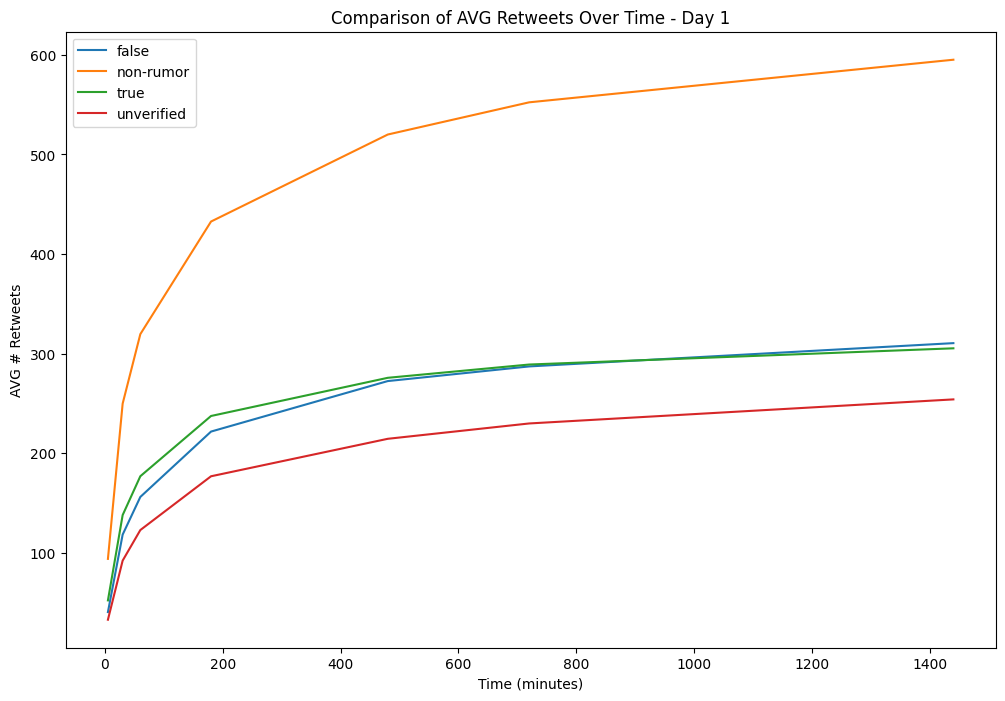

In [10]:
plot_avg_retweet_speed(dfs, titles)

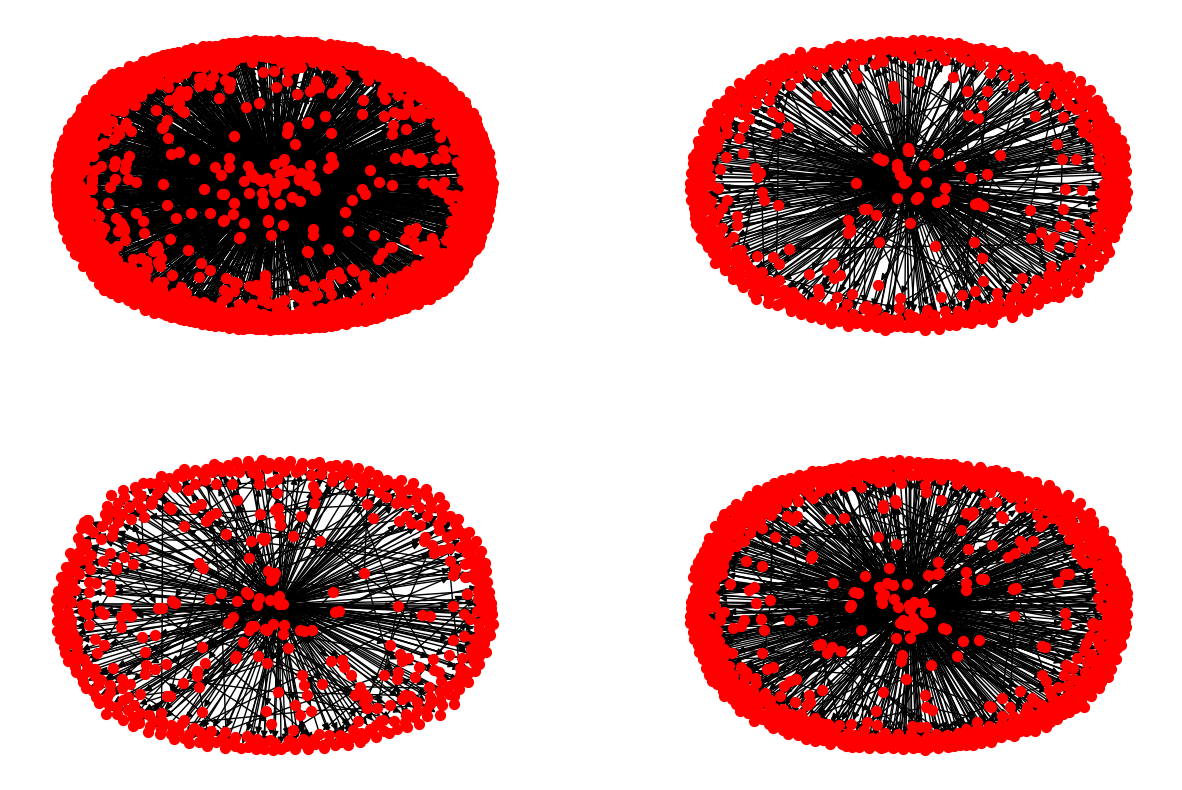

In [38]:
plot_max_depth_Gs(dfs)